In [1]:
import xarray as xr
import xesmf as xe
import numpy as np 
import pathlib as pl
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
data_path = "../"
database = data_path + "/CO_snotel.db"
dbengine = "sqlite:///{}".format(database)

df_butte     = pd.read_sql_table('380', dbengine)
df_schofield = pd.read_sql_table('737', dbengine)
df_taylor    = pd.read_sql_table('1141', dbengine)

# fix the indices
df_butte     = df_butte.set_index("Date")
df_schofield = df_schofield.set_index("Date")
df_taylor    = df_taylor.set_index("Date")


In [51]:
times  = pd.date_range("2018-10-01", "2019-04-01", freq='1D')
times2 = pd.date_range("2019-10-01", "2020-04-01", freq='1D')


timel1 = pd.to_datetime("2018-04-01")
timel2 = pd.to_datetime("2019-04-01")


# (df_butte.loc[times].SWE*25.4).plot(ax=ax, color='black', linewidth=2)
# (df_butte.loc[times].AccPrecip*25.4).plot(ax=ax, color='black', linewidth=2, linestyle='--')

def pswepacc(df,t):
    swel  = df.loc[t].SWE*25.4  
    paccl = df.loc[t].AccPrecip*25.4
    return (swel - paccl)/paccl * 100

pswepacc(df_butte, timel1), pswepacc(df_schofield, timel1), pswepacc(df_taylor, timel1)



(-2.222222222222215, 16.289592760180984, -20.30075187969926)

## Compute the average difference between the accumulated precip at the start of april and SWE

In [28]:
np.array([pswepacc(df_butte, timel2), pswepacc(df_schofield, timel2), pswepacc(df_taylor, timel2)]).mean()

2.6137444225001776

In [29]:
np.array([pswepacc(df_butte, timel1), pswepacc(df_schofield, timel1), pswepacc(df_taylor, timel1)]).mean()

-2.0777937805801634

## Compute the average temperatures

In [52]:
(np.array([df_schofield.loc[times].TavgF.mean(), df_butte.loc[times].TavgF.mean(), df_taylor.loc[times].TavgF.mean()]).mean() -  32) * 5/9

-4.847196923699656

In [53]:
(np.array([df_schofield.loc[times2].TavgF.mean(), df_butte.loc[times2].TavgF.mean(), df_taylor.loc[times2].TavgF.mean()]).mean() -  32) * 5/9

-4.22000805152979

In [54]:
(-4.2 + -4.8)/2

-4.5

In [49]:
times  = pd.date_range("2018-10-01", "2019-04-01", freq='1D')
times2 = pd.date_range("2019-10-01", "2020-04-01", freq='1D')

In [50]:
times

DatetimeIndex(['2018-10-01', '2018-10-02', '2018-10-03', '2018-10-04',
               '2018-10-05', '2018-10-06', '2018-10-07', '2018-10-08',
               '2018-10-09', '2018-10-10',
               ...
               '2019-03-23', '2019-03-24', '2019-03-25', '2019-03-26',
               '2019-03-27', '2019-03-28', '2019-03-29', '2019-03-30',
               '2019-03-31', '2019-04-01'],
              dtype='datetime64[ns]', length=183, freq='D')

<AxesSubplot:>

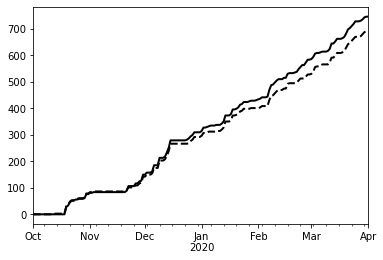

In [24]:
fig,ax = plt.subplots()
(df_schofield.loc[times].SWE*25.4).plot(ax=ax, color='black', linewidth=2)
(df_schofield.loc[times].AccPrecip*25.4).plot(ax=ax, color='black', linewidth=2, linestyle='--')

In [4]:
#ls /home/wrudisill/scratch/EastLSM_Only/250m_ModelRuns/model_outputs/model_out_0410_morrison_2019/

In [11]:
# open up the swe data 
aso_dat1 = pl.Path("/home/wrudisill/scratch/EastLSM_Only/most_recent_aso_data/swe_regrid_250m_ASO_250M_SWE_bilin_20180331_latlon.nc")
aso_dat2 = pl.Path("/home/wrudisill/scratch/EastLSM_Only/most_recent_aso_data/swe_regrid_250m_ASO_250M_SWE_bilin_20190407_latlon.nc")

# open up hte snow depth data 
aso_sd_dat1 = pl.Path("/home/wrudisill/scratch/EastLSM_Only/most_recent_aso_data/sd_regrid_250m_ASO_SD_250m_bilin_20180330_latlon.nc")
aso_sd_dat2 = pl.Path("/home/wrudisill/scratch/EastLSM_Only/most_recent_aso_data/sd_regrid_250m_ASO_SD_250m_bilin_20190407_latlon.nc")


# open up the model data 
mp08_run = pl.Path("/scratch/wrudisill/EastLSM_Only/250m_ModelRuns/model_outputs2/model_out_wy2018_Thompson.nc")
mp10_run = pl.Path("/scratch/wrudisill/EastLSM_Only/250m_ModelRuns/model_outputs2/model_out_wy2018_Morrison.nc")
mp55_run = pl.Path("/scratch/wrudisill/EastLSM_Only/250m_ModelRuns/model_outputs2/model_out_wy2018_Ishmael.nc")
mp08_run19 = pl.Path("/scratch/wrudisill/EastLSM_Only/250m_ModelRuns/model_outputs2/model_out_wy2019_Thompson.nc")
mp10_run19 = pl.Path("/scratch/wrudisill/EastLSM_Only/250m_ModelRuns/model_outputs2/model_out_wy2019_Morrison.nc")
mp55_run19 = pl.Path("/scratch/wrudisill/EastLSM_Only/250m_ModelRuns/model_outputs2/model_out_wy2019_Ishmael.nc")

# read it in ...
mp08_lsmout_2018 = xr.open_dataset(mp08_run)
mp10_lsmout_2018 = xr.open_dataset(mp10_run)
mp55_lsmout_2018 = xr.open_dataset(mp55_run)
mp08_lsmout_2019 = xr.open_dataset(mp08_run19)
mp10_lsmout_2019 = xr.open_dataset(mp10_run19)
mp55_lsmout_2019 = xr.open_dataset(mp55_run19)




# geog file 
geog = xr.open_dataset("/home/wrudisill/scratch/EastLSM_Only/most_recent_aso_data/geo_em_updatedDEM.d01.nc")
east_mask = geog.EAST_MASK.where(geog.EAST_MASK >0)
other_mask = geog.OTHR_MASK.where(geog.OTHR_MASK >0)


In [ ]:
# GET the snotel data 

In [ ]:
# get the aso data and hte lat lons..

In [17]:
# open up all of the swe data ... 
swe1=xr.open_dataset(aso_dat1)
swe2=xr.open_dataset(aso_dat2)

sd1=xr.open_dataset(aso_sd_dat1).Band1
sd2=xr.open_dataset(aso_sd_dat2).Band1

# get just the swe in mm 
swevar1 = swe1.where(swe1>0).Band1*1000
swevar2 = swe2.where(swe2>0).Band1*1000

# get the density ...
dens1 = swevar1/sd1
dens2 = swevar2/sd2





def get_aso_xy(lat, lon):
    #lat = 38.89
    #lon = -106.95
    xlat = swevar1.lat.values
    xlon = swevar1.lon.values
    dist = np.sqrt((xlat - lat)**2 + (xlon - lon)**2)
    mindist = dist.min()
    ixlat = np.argwhere(dist == mindist)[0][0]
    ixlon = np.argwhere(dist == mindist)[0][1]
    return {"south_north":slice(ixlat-2, ixlat+2), "west_east":slice(ixlon-2,ixlon+2)}


def get_lsm_xy(lat, lon):
    #lat = 38.89
    #lon = -106.95
    xlat = swevar1.lat.values
    xlon = swevar1.lon.values
    dist = np.sqrt((xlat - lat)**2 + (xlon - lon)**2)
    mindist = dist.min()
    ixlat = np.argwhere(dist == mindist)[0][0]
    ixlon = np.argwhere(dist == mindist)[0][1]
    return {"south_north":slice(ixlat-1, ixlat+1), "west_east":slice(ixlon-1,ixlon+1)}





bute_lat, bute_lon = 38.89, -106.95
scho_lat, scho_lon = 39.02, -107.05
tayl_lat, tayl_lon = 38.99, -106.75

In [7]:
geog = xr.open_dataset("/home/wrudisill/scratch/EastLSM_Only/most_recent_aso_data/geo_em_updatedDEM.d01.nc")
geog.OTHR_MASK

<xarray.DataArray 'OTHR_MASK' (Time: 1, south_north: 239, west_east: 179)>
array([[[0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.],
        ...,
        [0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.]]], dtype=float32)
Dimensions without coordinates: Time, south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    units:        meters MSL
    description:  GMTED2010 30-arc-second topography height
    stagger:      M
    sr_x:         1
    sr_y:         1

In [8]:
get_lsm_xy(bute_lat, bute_lon)

{'y': slice(123, 125, None), 'x': slice(80, 82, None)}

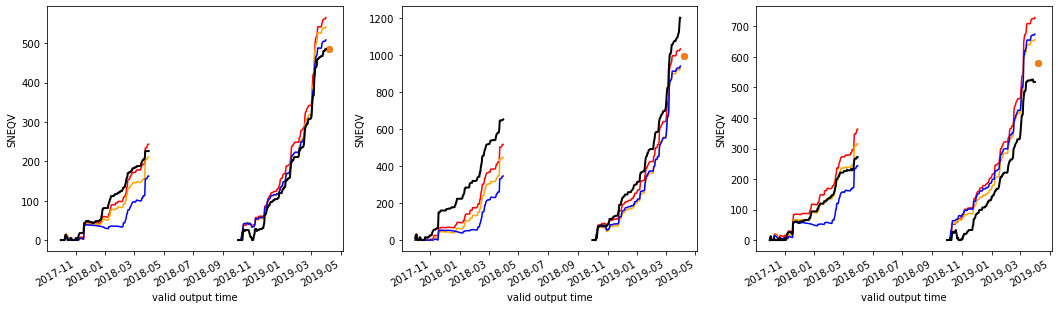

In [22]:
fig,ax = plt.subplots(1,3)
fig.set_size_inches(18,5)

times=pd.date_range("2017-10-01", "2018-03-31", freq='1D')
###########################################################################
#### WATER YEAR 2018
###########################################################################

## BUTTE 
mp55_lsmout_2018.SNEQV.isel(get_lsm_xy(bute_lat, bute_lon)).mean(dim=("south_north","west_east")).sel(time=times).plot(ax=ax[0], color='red')
mp10_lsmout_2018.SNEQV.isel(get_lsm_xy(bute_lat, bute_lon)).mean(dim=("south_north","west_east")).sel(time=times).plot(ax=ax[0], color='orange')
mp08_lsmout_2018.SNEQV.isel(get_lsm_xy(bute_lat, bute_lon)).mean(dim=("south_north","west_east")).sel(time=times).plot(ax=ax[0], color='blue')
(df_butte.loc[times].SWE*25.4).plot(ax=ax[0], color='black', linewidth=2)

## SCHOFIELD
mp55_lsmout_2018.SNEQV.isel(get_lsm_xy(scho_lat, scho_lon)).mean(dim=("south_north","west_east")).sel(time=times).plot(ax=ax[1], color='red')
mp10_lsmout_2018.SNEQV.isel(get_lsm_xy(scho_lat, scho_lon)).mean(dim=("south_north","west_east")).sel(time=times).plot(ax=ax[1], color='orange')
mp08_lsmout_2018.SNEQV.isel(get_lsm_xy(scho_lat, scho_lon)).mean(dim=("south_north","west_east")).sel(time=times).plot(ax=ax[1], color='blue')

(df_schofield.loc[times].SWE*25.4).plot(ax=ax[1], color='black', linewidth=2)

## TAYLOR

mp55_lsmout_2018.SNEQV.isel(get_lsm_xy(tayl_lat, tayl_lon)).mean(dim=("south_north","west_east")).sel(time=times).plot(ax=ax[2], color='red')
mp10_lsmout_2018.SNEQV.isel(get_lsm_xy(tayl_lat, tayl_lon)).mean(dim=("south_north","west_east")).sel(time=times).plot(ax=ax[2], color='orange')
mp08_lsmout_2018.SNEQV.isel(get_lsm_xy(tayl_lat, tayl_lon)).mean(dim=("south_north","west_east")).sel(time=times).plot(ax=ax[2], color='blue')

(df_taylor.loc[times].SWE*25.4).plot(ax=ax[2], color='black', linewidth=2)

x = pd.to_datetime("2019-04-07")
ax[0].scatter(x, swevar2.sel(get_aso_xy(bute_lat, bute_lon)).mean(dim=("south_north", "west_east")))             
ax[1].scatter(x, swevar2.sel(get_aso_xy(scho_lat, scho_lon)).mean(dim=("south_north", "west_east")))             
ax[2].scatter(x, swevar2.sel(get_aso_xy(tayl_lat, tayl_lon)).mean(dim=("south_north", "west_east")))             

###########################################################################
#### WATER YEAR 2019
###########################################################################
times=pd.date_range("2018-10-01", "2019-03-31", freq='1D')

## BUTTE 
mp55_lsmout_2019.SNEQV.isel(get_lsm_xy(bute_lat, bute_lon)).mean(dim=("south_north","west_east")).sel(time=times).plot(ax=ax[0], color='red')
mp10_lsmout_2019.SNEQV.isel(get_lsm_xy(bute_lat, bute_lon)).mean(dim=("south_north","west_east")).sel(time=times).plot(ax=ax[0], color='orange')
mp08_lsmout_2019.SNEQV.isel(get_lsm_xy(bute_lat, bute_lon)).mean(dim=("south_north","west_east")).sel(time=times).plot(ax=ax[0], color='blue')
(df_butte.loc[times].SWE*25.4).plot(ax=ax[0], color='black', linewidth=2)

## SCHOFIELD
mp55_lsmout_2019.SNEQV.isel(get_lsm_xy(scho_lat, scho_lon)).mean(dim=("south_north","west_east")).sel(time=times).plot(ax=ax[1], color='red')
mp10_lsmout_2019.SNEQV.isel(get_lsm_xy(scho_lat, scho_lon)).mean(dim=("south_north","west_east")).sel(time=times).plot(ax=ax[1], color='orange')
mp08_lsmout_2019.SNEQV.isel(get_lsm_xy(scho_lat, scho_lon)).mean(dim=("south_north","west_east")).sel(time=times).plot(ax=ax[1], color='blue')

(df_schofield.loc[times].SWE*25.4).plot(ax=ax[1], color='black', linewidth=2)

## TAYLOR

mp55_lsmout_2019.SNEQV.isel(get_lsm_xy(tayl_lat, tayl_lon)).mean(dim=("south_north","west_east")).sel(time=times).plot(ax=ax[2], color='red')
mp10_lsmout_2019.SNEQV.isel(get_lsm_xy(tayl_lat, tayl_lon)).mean(dim=("south_north","west_east")).sel(time=times).plot(ax=ax[2], color='orange')
mp08_lsmout_2019.SNEQV.isel(get_lsm_xy(tayl_lat, tayl_lon)).mean(dim=("south_north","west_east")).sel(time=times).plot(ax=ax[2], color='blue')

(df_taylor.loc[times].SWE*25.4).plot(ax=ax[2], color='black', linewidth=2)

x = pd.to_datetime("2019-04-07")
ax[0].scatter(x, swevar2.sel(get_aso_xy(bute_lat, bute_lon)).mean(dim=("south_north", "west_east")))             
ax[1].scatter(x, swevar2.sel(get_aso_xy(scho_lat, scho_lon)).mean(dim=("south_north", "west_east")))             
ax[2].scatter(x, swevar2.sel(get_aso_xy(tayl_lat, tayl_lon)).mean(dim=("south_north", "west_east")))             




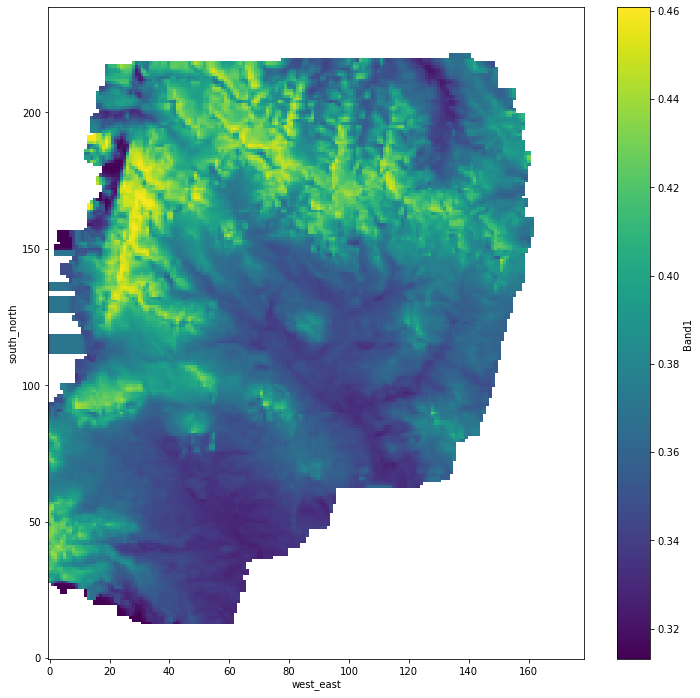

In [14]:
noahmp_density = (dsmp55_18.SNEQV.sel(time=x)/1000.)/dsmp55_18.SNOWH.sel(time=x)
aso_density    = aso_swe.where(aso_swe.Band1>0).Band1/aso_sd.where(aso_sd.Band1>0).Band1


fig,ax = plt.subplots()
fig.set_size_inches(12,12)

#density * geog.OTHRMASK
aso_density.plot(ax=ax)

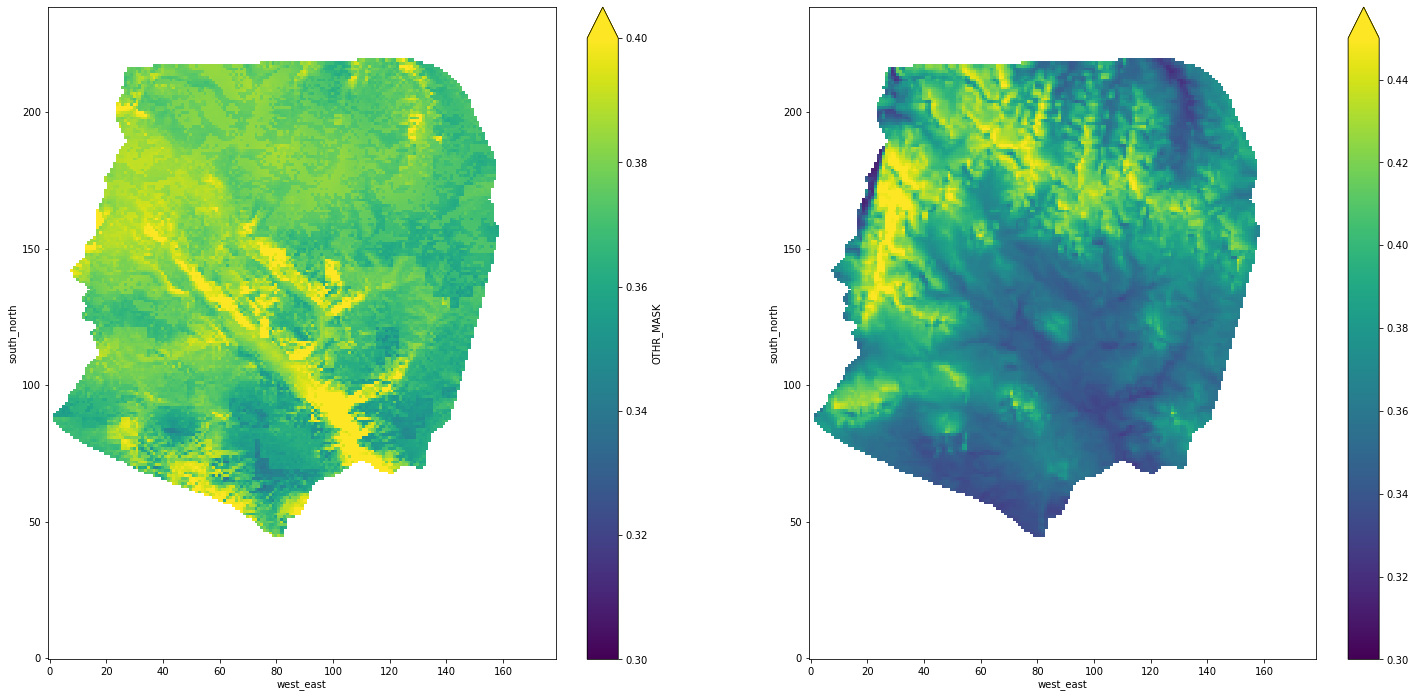

In [22]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(25,12)

mden = (noahmp_density.values * geog.OTHR_MASK)
mden = mden.where(mden >0)
mden.plot(ax=ax[0], vmin=.3, vmax=.4)#  vmin=.3, vmax=.6)

aso_dens_mask = (aso_density*geog.OTHR_MASK)
aso_dens_mask = aso_dens_mask.where(aso_dens_mask>0)
aso_dens_mask.plot(ax=ax[1], vmin=.3, vmax=.45)# vmin=.3, vmax=.6)

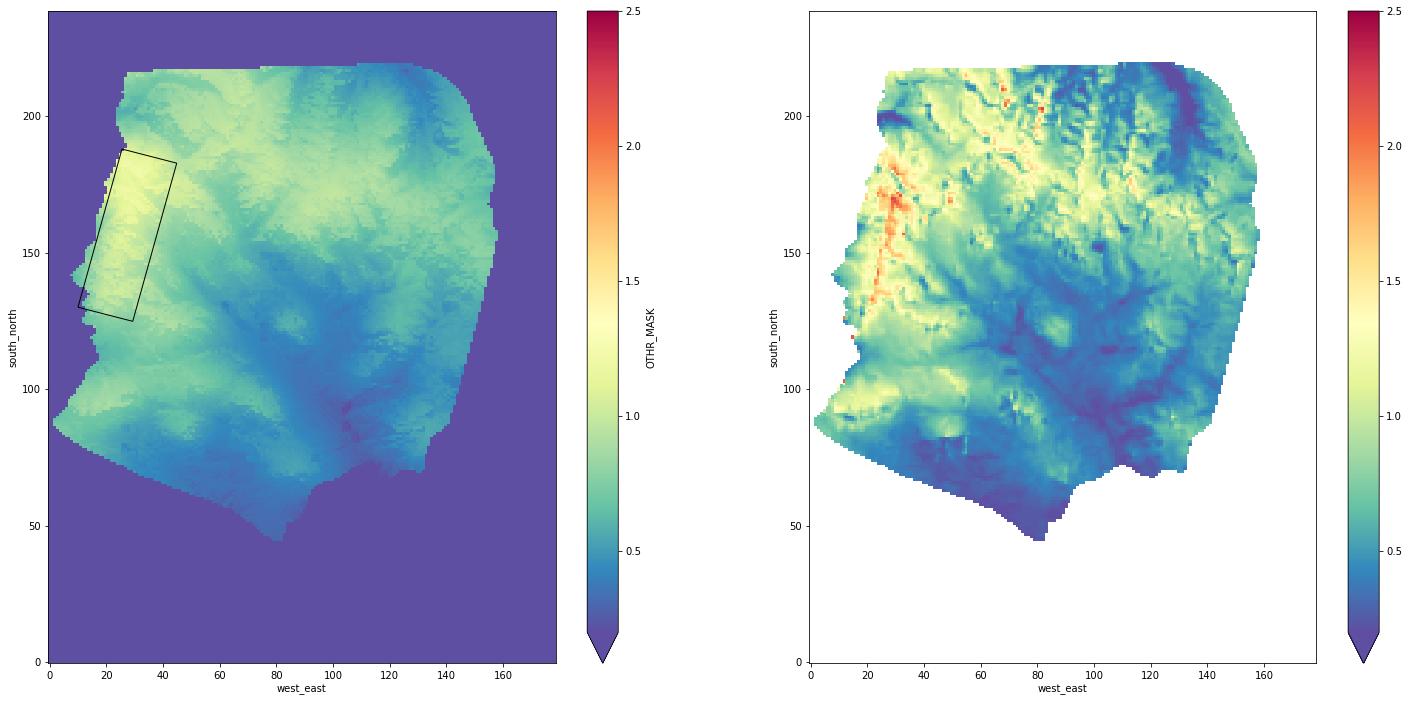

In [207]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(25,12)

noamp_swe = (dsmp55_18.SNEQV.sel(time=x)/1000.).values*geog.OTHR_MASK

noamp_swe.plot(ax=ax[0], vmin=.2, vmax=2.5, cmap="Spectral_r")
recomputed_swe = aso_sd.where(aso_sd.Band1>0).Band1 * mden.isel(Time=0)
recomputed_swe.plot(ax=ax[1], vmin=.2, vmax=2.5, cmap="Spectral_r")

import matplotlib.patches as patches

rect = patches.Rectangle((10,130), 20, 60, fill=False, angle=-15) #transform=ax.get_transform())
ax[0].add_patch(rect)

In [208]:
#help(patches.Rectangle)

In [212]:
#fig, ax=plt.subplots()
#fig.set_size_inches(12,12)
np.sqrt(np.sum((recomputed_swe - noamp_swe)**2))
#np.sqrt(np.sum((recomputed_swe - aso_swe.where(aso_swe.Band1>0).Band1)**2))

<xarray.DataArray ()>
array(23.81348061)

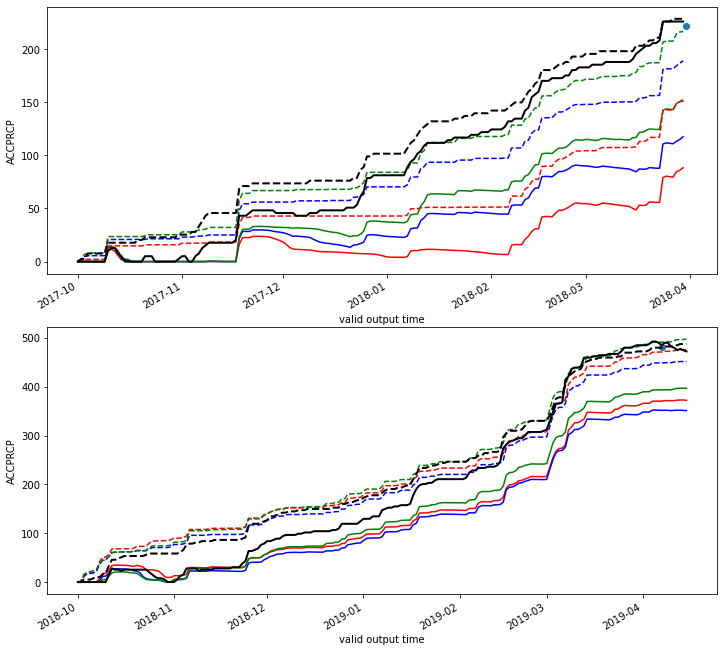

In [90]:
fig,ax = plt.subplots(2,1)
fig.set_size_inches(12,12)

times=pd.date_range("2017-10-01", "2018-03-30", freq='1D')
dsmp08_18.SNEQV.isel(get_lsm_xy(bute_lat, bute_lon)).mean(dim=("x","y")).sel(time=times).plot(ax=ax[0], color='red')
dsmp10_18.SNEQV.isel(get_lsm_xy(bute_lat, bute_lon)).mean(dim=("x","y")).sel(time=times).plot(ax=ax[0], color='blue')
dsmp55_18.SNEQV.isel(get_lsm_xy(bute_lat, bute_lon)).mean(dim=("x","y")).sel(time=times).plot(ax=ax[0], color='green')

dsmp08_18.ACCPRCP.isel(get_lsm_xy(bute_lat, bute_lon)).mean(dim=("x","y")).sel(time=times).plot(ax=ax[0], linestyle='--', color='red')
dsmp10_18.ACCPRCP.isel(get_lsm_xy(bute_lat, bute_lon)).mean(dim=("x","y")).sel(time=times).plot(ax=ax[0], linestyle='--', color='blue')
dsmp55_18.ACCPRCP.isel(get_lsm_xy(bute_lat, bute_lon)).mean(dim=("x","y")).sel(time=times).plot(ax=ax[0], linestyle='--', color='green')


x = pd.to_datetime("2018-03-31")
ax[0].scatter(x, swevar1.sel(get_aso_xy(bute_lat, bute_lon)).mean(dim=("south_north", "west_east")))             
(df_butte.loc[times].SWE*25.4).plot(ax=ax[0], color='black', linewidth=2)
(df_butte.loc[times].AccPrecip*25.4).plot(ax=ax[0], color='black', linewidth=2, linestyle='--')



times=pd.date_range("2018-10-01", "2019-04-15", freq='1D')
dsmp08_19.SNEQV.isel(get_lsm_xy(bute_lat, bute_lon)).mean(dim=("x","y")).sel(time=times).plot(ax=ax[1], color='red')
dsmp10_19.SNEQV.isel(get_lsm_xy(bute_lat, bute_lon)).mean(dim=("x","y")).sel(time=times).plot(ax=ax[1], color='blue')
dsmp55_19.SNEQV.isel(get_lsm_xy(bute_lat, bute_lon)).mean(dim=("x","y")).sel(time=times).plot(ax=ax[1], color='green')


dsmp08_19.ACCPRCP.isel(get_lsm_xy(bute_lat, bute_lon)).mean(dim=("x","y")).sel(time=times).plot(ax=ax[1], linestyle='--', color='red')
dsmp10_19.ACCPRCP.isel(get_lsm_xy(bute_lat, bute_lon)).mean(dim=("x","y")).sel(time=times).plot(ax=ax[1], linestyle='--', color='blue')
dsmp55_19.ACCPRCP.isel(get_lsm_xy(bute_lat, bute_lon)).mean(dim=("x","y")).sel(time=times).plot(ax=ax[1], linestyle='--', color='green')

(df_butte.loc[times].SWE*25.4).plot(ax=ax[1], color='black', linewidth=2)
(df_butte.loc[times].AccPrecip*25.4).plot(ax=ax[1], color='black', linewidth=2, linestyle='--')

x = pd.to_datetime("2019-04-07")
swevar1.sel(get_aso_xy(bute_lat, bute_lon)).mean

ax[1].scatter(x, swevar2.sel(get_aso_xy(bute_lat, bute_lon)).mean(dim=("south_north", "west_east")))             



In [6]:
#(df_butte.loc["2018-10-01":"2019-05-01"].SWE*25.4).plot(ax=ax[1,0])
# (df_butte.loc["2018-10-01":"2019-05-01"].SWE*25.4).plot(ax=ax[1,0])
# (df_butte.loc["2018-10-01":"2019-05-01"].AccPrecip*25.4).plot(ax=ax[1,0])

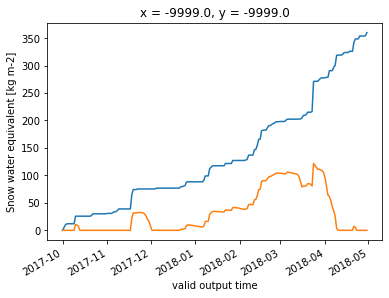

In [11]:
dsmp10_18.ACCPRCP.isel(y=100,x=50).plot()
dsmp10_18.SNEQV.isel(y=100,x=50).plot()
#dsmp10_18.ACSNOM.isel(y=100,x=50).plot()

In [76]:
df_butte

,SWE,AccPrecip,TmaxF,TminF,TavgF,IncPrecip
Date,,,,,,
1980-10-01,0.0,0.0,NaN,NaN,NaN,0.0
1980-10-02,0.0,0.0,NaN,NaN,NaN,0.0
1980-10-03,0.0,0.0,NaN,NaN,NaN,0.0
1980-10-04,0.0,0.0,NaN,NaN,NaN,0.0
1980-10-05,0.0,0.0,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...
2021-01-17,5.1,5.7,36.0,23.0,29.0,0.0
2021-01-18,5.1,5.7,31.0,18.0,24.0,0.0
2021-01-19,5.1,5.7,26.0,15.0,19.0,0.1
